# SI 618 - Homework #2: More Data Manipulation

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

Version 2021.02.08.1.CT

# Background
You're a Data Science Consultant for an eCommerce retail company, they've asked you to analyze their sales database. Unfortunately, they did nothing to prepare or clean their data, only exporting their 3 database tables as JSON files. It's up to you to clean their data, analyze it and answer questions to help drive business value!

### The below files have been provided via the URLs shown:
- invoices.json https://github.com/umsi-data-science/data/raw/main/invoices.json
- items.json https://github.com/umsi-data-science/data/raw/main/items.json
- purchases.json https://github.com/umsi-data-science/data/raw/main/purchases.json

### They provided this data dictionary:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.  
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
**Description:** Product (item) name. Nominal.   
**Quantity:** The quantities of each product (item) per transaction. Numeric.  
**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.  
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.  
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
**Country:** Country name. Nominal, the name of the country where each customer resides.  

### A few notes from the company:
* If the InvoiceNo starts with the letter 'c', it indicates a cancellation. When conducting this analysis we only want to analyze invoices that were shipped. (ie. not canceled)
* The datasets should be able to be merged, each row in the invoice table corresponds to multiple rows in the purchases table.
* To find out the description or unit cost of an item in the purchase table, the StockCode should be used to match up the product in the items table. 
* They mentioned that they've been having a difficult time lately joining the items and purchases table, maybe there's something wrong with the columns?

# Answer the questions below.
- Write your Python code that can answer the following questions, 
- and explain **ALL** your answers in plain English. 

In [1]:
MY_UNIQNAME = 'cyuntao'

In [2]:
import pandas as pd
import numpy as np

### <span style="color:magenta"> Q1. [5 points] Describe the dataset. </span>
1. Load the data. 
1. How many total invoices have been placed?
1. How many unique customers are there?
1. What the total number of unique items?
1. Are there any columns with null values?
1. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

In [3]:
invoices = pd.read_json('invoices.json')
items = pd.read_json('items.json')
purchases = pd.read_json('purchases.json')
# invoices = pd.read_json('https://github.com/umsi-data-science/data/raw/main/invoices.json')
# items = pd.read_json('https://github.com/umsi-data-science/data/raw/main/items.json')
# purchases = pd.read_json('https://github.com/umsi-data-science/data/raw/main/purchases.json')

In [4]:
invoices_shipped = invoices[~invoices.InvoiceNo.str.startswith('C')].drop_duplicates('InvoiceNo', keep='first')
invoices_shipped.head()

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom


In [5]:
invoices_shipped.InvoiceNo.nunique()

22064

In [6]:
invoices_shipped.CustomerID.nunique()

4339

In [7]:
items.head()

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39


In [8]:
items.StockCode.nunique()

4070

In [9]:
purchases_shipped = purchases[~purchases.InvoiceNo.str.startswith('C')].rename(columns={'StockCodeSC': 'StockCode'}).copy()
purchases_shipped.StockCode = purchases_shipped.StockCode.str.lstrip('SC')
purchases_shipped.head()

,InvoiceNo,StockCode,Quantity
0,536365,85123A,6
1,536365,71053,6
2,536365,84406B,8
3,536365,84029G,6
4,536365,84029E,6


In [10]:
invoices_shipped.columns[invoices_shipped.isna().any()]

Index(['CustomerID'], dtype='object')

In [11]:
items.columns[items.isna().any()]

Index(['Description'], dtype='object')

In [12]:
purchases_shipped.columns[purchases_shipped.isna().any()]

Index([], dtype='object')

In [13]:
invoices_customer = invoices_shipped.dropna(subset=['CustomerID'])  # used for customer related analysis

In [14]:
invoices_shipped.merge(purchases_shipped, how='outer', indicator=True)._merge.value_counts()

both          532621
left_only          0
right_only         0
Name: _merge, dtype: int64

In [15]:
invoices_customer.merge(purchases_shipped, how='outer', indicator=True)._merge.value_counts()

both          397924
right_only    134697
left_only          0
Name: _merge, dtype: int64

In [16]:
items.merge(purchases_shipped, how='outer', indicator=True)._merge.value_counts()

both          532477
right_only       144
left_only         13
Name: _merge, dtype: int64

1. The datasets are loaded. Then I drop the rows with InvoiceNo starts with letter 'C' in the invoices and purchases tables, as in the analysis here, we only analyze invoices that were shipped. Furthermore, I notice that there are a few duplicates in the InvoiceNo from the invoices table, which is unreasonable as the InvoiceNo should be unique, so I drop these duplicates.
2. 22064 total invoices have been placed.
3. There are 4339 unique customers.
4. The total number of unique items is 4070.
5. There are two columns with null values: CustomerID column in the invoices table, and the Description column in the items table. The description column does not matter as there exists a unique StockCode for each item. However, as the CustomerID is "uniquely assigned to each customer", I would drop the rows with null CustomerID in the invoices table when conducting customer related analysis (but it seems that the following parts where the invoice table is used are all related to customers).
6. I would use inner join with the key InvoiceNo on the invoices and purchases table, and inner join with the key StockCode on the items and purchases table. This is because the outer joins with `indicater=True` show that there exist some right_only or left_only values, and I think I would just use inner join to ensure that the results are matched in merged tables. 

### <span style="color:magenta"> Q2. [10 points] Invoice Analysis </span>
1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.
2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.
3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

_Hint: For 2.2, you may need to join two datasets together to answer the question._

In [17]:
invoices_customer.groupby('CustomerID').count()['InvoiceNo'].sort_values(ascending=False).head(11)

CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     74
16029.0     63
13408.0     62
18102.0     60
Name: InvoiceNo, dtype: int64

In [18]:
invoices_customer.merge(purchases_shipped, how='inner').groupby('CustomerID').sum().sort_values(
    'Quantity', ascending=False).head(11)

,Quantity
CustomerID,
14646.0,197491
16446.0,80997
14911.0,80515
12415.0,77670
12346.0,74215
17450.0,69993
17511.0,64549
18102.0,64124
13694.0,63312


In [19]:
top10_customers_invoices = invoices_customer.CustomerID.value_counts().head(10).index.tolist()
top10_customers_quantity = invoices_customer.merge(purchases_shipped, how='inner').groupby(
    'CustomerID').sum().sort_values('Quantity', ascending=False).head(10).index.tolist()
set(top10_customers_invoices) & set(top10_customers_quantity)

{14646.0, 14911.0}

1. The top 10 customers in terms of the total invoices that they have purchased are listed above. Actually I list the top 11 customers to make sure there is no tier 10. 
2. The top 10 customers in terms of the total quantity of items that they have purchased are also listed above. Here I join the invoices and purchases table.
3. Comparing the top 10 customers, it doesn't appear that the more invoices a customer has, the greater the total quantity of items, as the CustomerID in the two tables of top 10 customers have only 2 intersections. Some customers may purchase a large quantity of items in a single invoice.

### <span style="color:magenta"> Q3. [10 points] Item Analysis </span>
1. What is the average item-unit price? 
1. What % of items are under $20?
1. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram? 

In [20]:
items.UnitPrice.describe()

count     4070.000000
mean         6.905278
std        173.775142
min          0.000000
25%          1.250000
50%          2.510000
75%          4.250000
max      11062.060000
Name: UnitPrice, dtype: float64

In [21]:
len(items)  # indicates each row in the items table is unique

4070

In [22]:
len(items[items['UnitPrice'] < 20])/ len(items)

0.9837837837837838

<AxesSubplot:title={'center':'Histogram of Unit Prices'}, ylabel='Frequency'>

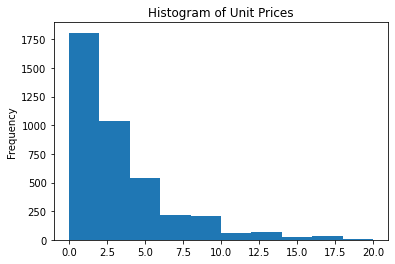

In [23]:
items.UnitPrice.plot.hist(range=[0,20], title='Histogram of Unit Prices', xlabel='Unit Price ($)')

1. The average item-unit price is about $6.91.

2. About 98.4% of items are under $20.

3. I chose 0 as the min value for the x-axis, and 20 as the max value for the x-axis. 0 is indeed the min value, and as over 98% of the items are under $20, it is reasonable to pick 20 as the max value. From the histogram, we can see the distribution is right-skewed. The unit-price data is concentrated in the range of 0-5. The group of 0-2.5 is the bin with highest frequency.

### <span style="color:magenta"> Q4. [25 points] Order Trends </span>
1. What are the top 10 most ordered items? Describe them, do you see any trends?  
1. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by marking up the unit price by 25%.) 
1. Do the top invoices contain any of the top 10 most ordered items?

_Hint: When calculating the revenue we suggest adding a new column on the dataframe._

In [24]:
item_purchase = items.merge(purchases_shipped, how='inner')
item_purchase.groupby('StockCode').sum().Quantity.sort_values(
    ascending=False).head(11)

StockCode
23843     80995
23166     78033
22197     56921
84077     55047
85099B    48478
85123A    41408
21212     36419
84879     36301
23084     30754
22492     26633
22616     26339
Name: Quantity, dtype: int64

In [25]:
top10_items = item_purchase.groupby('StockCode').sum().Quantity.sort_values(
    ascending=False).head(10).index.tolist()
items[items['StockCode'].isin(top10_items)]

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
9,84879,ASSORTED COLOUR BIRD ORNAMENT,1.69
44,22492,MINI PAINT SET VINTAGE,0.65
69,21212,PACK OF 72 RETROSPOT CAKE CASES,0.42
140,85099B,JUMBO BAG RED RETROSPOT,1.65
170,22197,SMALL POPCORN HOLDER,0.72
1367,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,0.29
2952,23166,MEDIUM CERAMIC TOP STORAGE JAR,1.04
3452,23084,RABBIT NIGHT LIGHT,2.08
4069,23843,"PAPER CRAFT , LITTLE BIRDIE",2.08


In [26]:
item_purchase['Revenue'] = 1.25*item_purchase['UnitPrice']*item_purchase['Quantity']  # an intermediary variable
item_purchase.groupby('InvoiceNo').sum().Revenue.sort_values(ascending=False).head(6)

InvoiceNo
547966    712212.5000
581483    210587.0000
541431     96479.5000
556255     37305.0000
556917     34545.9125
572035     32872.2000
Name: Revenue, dtype: float64

In [27]:
top5_invoices = item_purchase.groupby('InvoiceNo').sum().Revenue.sort_values(ascending=False).head().index.tolist()
top5_invoices_items = item_purchase[item_purchase['InvoiceNo'].isin(top5_invoices)].StockCode.unique()
set(top5_invoices_items) & set(top10_items)

{'21212', '22492', '23084', '23166', '23843', '85099B'}

1. The top 10 most ordered items are listed above. They all seem to be household goods or small items designed for children, and none of the items has a high unit-price. In fact, almost all of the top 10 most ordered items have unit prices below the average item unit price, which is $2.51.
2. The top 5 invoices that generated the most revenue are also listed above.
3. The top invoices contain 6 of the top 10 most ordered items.

### <span style="color:magenta"> Q5. [30 points] Customer Analysis </span>
1. Classify customers into segments based on the total revenue they have generated for the company.
 * low value: less than \$1000  
 * medium value: greater than 1000 less than \$8000
 * high value: greater than \$8000
1. How many customers are in each segment? 
1. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.
1. Are the items with the highest average order quantity generally the same across segments? Explain your reasoning. 
1. Select three items and discuss any trends/differences you notice across the three segments.

_Hint: When calculating the segment, we suggest constructing a new dataframe as an intermediary step with the columns: CustomerID, Revenue, Segment._

In [28]:
bins = [0, 1000, 8000, np.inf]
df_all = invoices_customer.merge(item_purchase, on='InvoiceNo', how='inner')
customer_segment = pd.DataFrame(df_all.groupby('CustomerID').sum().Revenue).reset_index()
customer_segment['Segment'] = pd.cut(customer_segment['Revenue'], bins, labels=['low','medium','high'])
customer_segment.head()

,CustomerID,Revenue,Segment
0,12346.0,96479.50,high
1,12347.0,6798.05,medium
2,12348.0,2237.70,medium
3,12349.0,2408.70,medium
4,12350.0,510.05,low


In [29]:
customer_segment.groupby('Segment').size()

Segment
low       2154
medium    1937
high       248
dtype: int64

In [30]:
df_segment = df_all.merge(customer_segment, on='CustomerID', how='inner').rename(columns={'Revenue_y': 'Revenue'})
df_segment.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCode,Description,UnitPrice,Quantity,Revenue_x,Revenue,Segment
0,536365,12/1/10 8:26,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,6,19.125,6785.5125,medium
1,536365,12/1/10 8:26,17850.0,United Kingdom,71053,WHITE METAL LANTERN,3.39,6,25.425,6785.5125,medium
2,536365,12/1/10 8:26,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,8,27.500,6785.5125,medium
3,536365,12/1/10 8:26,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,6,25.425,6785.5125,medium
4,536365,12/1/10 8:26,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,6,25.425,6785.5125,medium


In [31]:
quantity_by_segment = df_segment.pivot_table(index='StockCode', columns='Segment', values='Quantity', aggfunc=np.mean)
quantity_by_segment.head()

Segment,low,medium,high
StockCode,,,
10002,6.000000,10.259259,31.875000
10080,24.000000,14.055556,7.000000
10120,3.888889,8.388889,2.333333
10123C,2.000000,1.000000,NaN
10124A,3.500000,3.000000,NaN


In [32]:
highest = [quantity_by_segment['low'].idxmax(), quantity_by_segment['medium'].idxmax(), quantity_by_segment['high'].idxmax()]
highest

['84568', '18007', '23843']

In [33]:
quantity_by_segment[quantity_by_segment.index.isin(highest)]

Segment,low,medium,high
StockCode,,,
18007,1.0,387.133333,24.0
23843,NaN,NaN,80995.0
84568,576.0,288.000000,840.0


1. The customers are classified into segments based on the total revenue they have generated for the company.
2. There are 2154 customers in the low value segment, 1937 customers in the medium value segment, and 248 customers in the high value segment.
3. A pivot table that displays the average order quantity of each stock code for a given segment is created. Here I follow the segment definition in 5.1. Since the average order quantity of each stock code is calculated as (total quantity of an item in a certain segment) / (number of orders that have purchased this item in this segment), I leave the missing value unchanged, and it means currently there is no order of this item in a certain segment.
4. The items with the highest average order quantity are not generally the same across segments. Among the low value segment, the item with stock code '84568' has the highest average order quantity. Among the medium value segment, the item with stock code '18007' has the highest average order quantity. Among the high value segment, the item with stock code '23843' has the highest average order quantity. Customers in different segments tend to be interested in different items.
5. I just choose the 3 items in the last question, which are the items with the highest average order quantity in different segments. It seems that the items with the highest average order quantity in the medium and high value segment do not have a high average order quantity in the other two segments, but the item with the highest average order quantity in the low value segment has a high average order quantity among all of the three segments. In fact, the average order quantity in the high value segment of the item with the highest average order quantity in the low value segment is even higher than that in the low value segment.

# Please submit your completed notebook in .IPYNB and .HTML formats via Canvas